In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
# convert the timestamp to pandas datetime
df['FullDate'] = pd.to_datetime(df.FullDate)
df.set_index('FullDate', inplace=True)

In [4]:
# Resample the data from an hour sampling rate to a daily sampling rate (sum over the hours for each day)
df_daily = df.resample('D').sum()
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


## Plot of ElecPrice over time

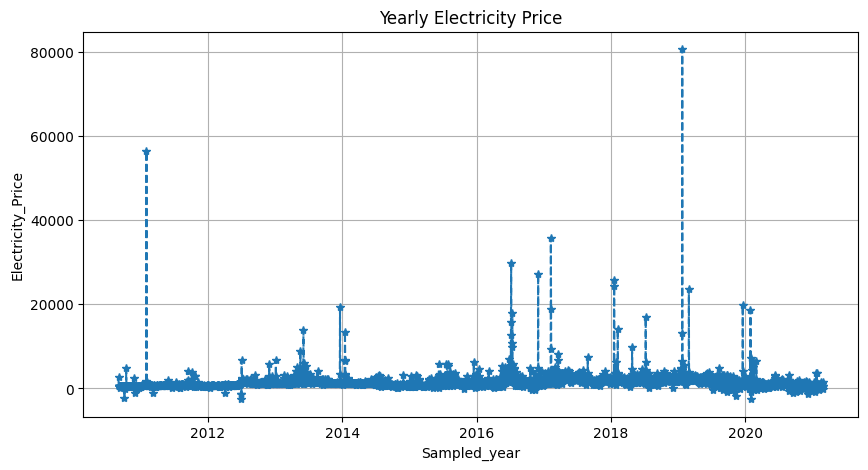

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df_daily.index, df_daily.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('Sampled_year')
plt.ylabel('Electricity_Price')
plt.title('Yearly Electricity Price')
plt.show()

In [6]:
sys_data = df_daily.SysLoad
gasprice_data = df_daily.GasPrice

# Augumented Dickey Fuller (ADF) test on sys_load data
sys_res = adfuller(sys_data)
pvalue_adf1 = sys_res[1]

# Augumented Dickey Fuller (ADF) test on gas_price data
gas_res = adfuller(gasprice_data)
pvalue_adf2 = gas_res[1]

# print the p-values of the variables
print("P-value for SysLoad: {:.6f}".format(pvalue_adf1))
print("P-value for GasPrice: {:.6f}".format(pvalue_adf2))


P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


In [7]:
elec_data = df_daily.ElecPrice


gas_res = adfuller(gasprice_data, maxlag=None, regression='c', autolag='AIC')
gas_cv = gas_res[4]

elec_res = adfuller(elec_data, maxlag=None, regression='c', autolag='AIC')
elec_cv = elec_res[4]

print("Critical Values for GasPrice:")
print("1%: {:.4f}".format(gas_cv['1%']))
print("5%: {:.4f}".format(gas_cv['5%']))
print("10%: {:.4f}".format(gas_cv['10%']))

print('**************************************************************')

print("Critical Values for ElecPrice:")
print("1%: {:.4f}".format(elec_cv['1%']))
print("5%: {:.4f}".format(elec_cv['5%']))
print("10%: {:.4f}".format(elec_cv['10%']))

Critical Values for GasPrice:
1%: -3.4321
5%: -2.8623
10%: -2.5672
**************************************************************
Critical Values for ElecPrice:
1%: -3.4321
5%: -2.8623
10%: -2.5672


# Univariate Analysis

In [8]:
# Make a copy
df1 = df_daily.copy()

In [9]:
df1 = df1.reset_index().rename({'FullDate': 'ds', 'ElecPrice': 'y'}, axis=1)
df1.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [10]:
# Split the data into Train and Test
data = (len(df_daily) - 2757)

train_uni = df1[:-data]
test_uni= df1[-data:]

In [11]:
train_uni.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [12]:
test_uni.tail()

,ds,Tmax,SysLoad,GasPrice,y
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980
3833,2021-02-28,583.2,6675.05485,131.6352,-98.985


In [13]:
train_uni.tail()

,ds,Tmax,SysLoad,GasPrice,y
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015
2756,2018-03-19,561.6,8731.39945,199.2720,1998.305


In [14]:
test_uni.head()

,ds,Tmax,SysLoad,GasPrice,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [15]:
model_uni = Prophet()
model_uni.fit(train_uni)

03:50:19 - cmdstanpy - INFO - Chain [1] start processing
03:50:20 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
#pred_uni = model_uni.make_future_dataframe(periods=len(test_uni), freq='D')
pred_uni = model_uni.make_future_dataframe(periods=len(test_uni), freq='D')

In [17]:
pred_uni.head()

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05


In [18]:
forecast1 = model_uni.predict(pred_uni)

In [19]:
# check the forecast length
print(len(forecast1))

# See only the forecasting columns
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

3834
          ds         yhat   yhat_lower   yhat_upper
0 2010-09-01   994.279309 -1368.210978  3441.699248
1 2010-09-02  1074.514366 -1279.957342  3344.910218
2 2010-09-03   849.411920 -1393.749762  3143.607090
3 2010-09-04   509.021391 -1894.554435  2737.436648
4 2010-09-05   418.981135 -1876.236747  2804.694780


In [20]:
def Mape(y_true, y_pred):
    return (np.mean(np.abs((y_true - y_pred) / y_true))) * 100
    
y_true = test_uni['y'].values
y_pred = forecast1['yhat'][-data:].values

mape = round(Mape(y_true, y_pred), 2)
print(f'MAPE of Univariate model: {mape}')  

MAPE of Univariate model: 544.95


In [21]:
# univariate model RMSE in 2 decimal places
rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
print(f'RMSE of univariate model: {rmse}')

RMSE of univariate model: 3208.69


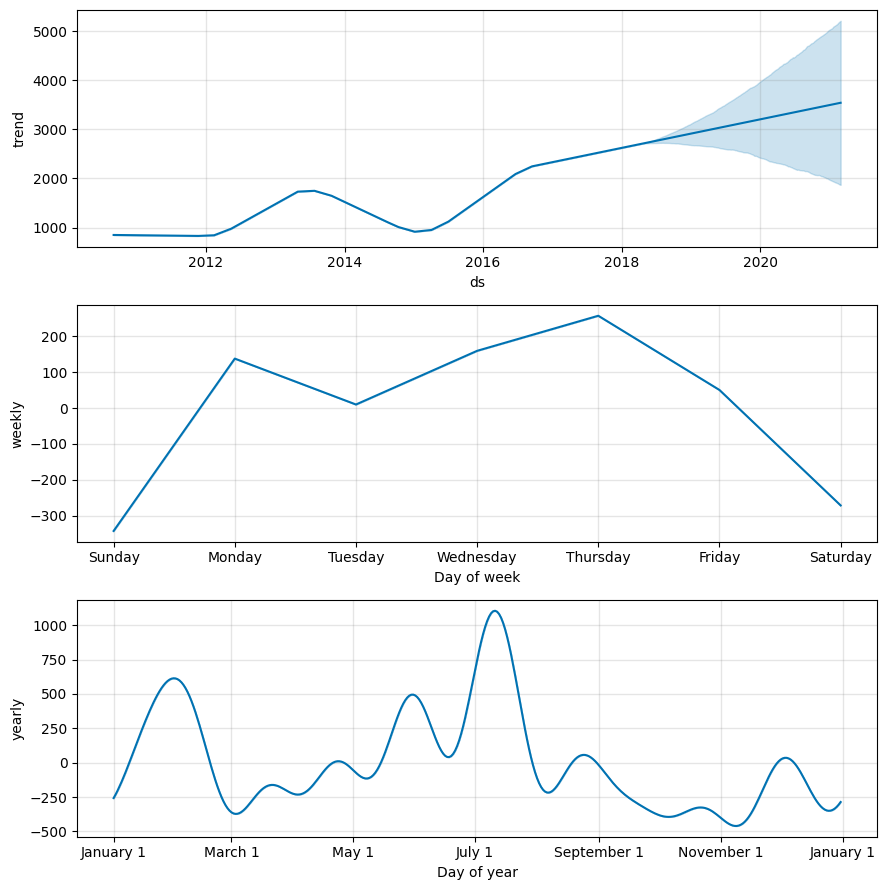

In [22]:
# plots component of the forecast
model_uni.plot_components(forecast1)
plt.show()

# Multivariate Analysis

In [23]:
multivariate_df = df_daily.reset_index()[['FullDate','SysLoad','Tmax','GasPrice','ElecPrice']].rename(
    {'FullDate':'ds', 'SysLoad':'add1', 'Tmax':'add2', 'GasPrice':'add3', 'ElecPrice':'y'}, axis=1
)
multivariate_df.head()

,ds,add1,add2,add3,y
0,2010-09-01,41565.380,379.2,88.56,2751.700
1,2010-09-02,38898.990,369.6,88.56,570.810
2,2010-09-03,41665.760,439.2,106.80,504.975
3,2010-09-04,35638.085,328.8,81.36,502.275
4,2010-09-05,35611.410,357.6,106.80,500.555


In [24]:
# split the data_with_regressors dataset
train_mul = multivariate_df[:2757]
test_mul = multivariate_df[2757:]

In [25]:
model_mul = Prophet()

# add regressors to the models
model_mul.add_regressor('add1')
model_mul.add_regressor('add2')
model_mul.add_regressor('add3')

In [26]:
model_mul.fit(train_mul)

03:50:59 - cmdstanpy - INFO - Chain [1] start processing
03:51:00 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
pred_mul = model_mul.make_future_dataframe(periods=len(test_mul), freq='D')

In [28]:
pred_mul['add1'] = multivariate_df['add1']
pred_mul['add2'] = multivariate_df['add2']
pred_mul['add3'] = multivariate_df['add3']
pred_mul

,ds,add1,add2,add3
0,2010-09-01,41565.38000,379.2,88.5600
1,2010-09-02,38898.99000,369.6,88.5600
2,2010-09-03,41665.76000,439.2,106.8000
3,2010-09-04,35638.08500,328.8,81.3600
4,2010-09-05,35611.41000,357.6,106.8000
...,...,...,...,...
3829,2021-02-24,-1525.49745,537.6,134.4000
3830,2021-02-25,4539.07855,518.4,130.5048
3831,2021-02-26,9517.02430,547.2,130.1808
3832,2021-02-27,4932.88015,564.0,130.0800


In [29]:
# forecast using the extra-regressors as predictors
forecast2 = model_mul.predict(pred_mul)
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds         yhat   yhat_lower   yhat_upper
0 2010-09-01  1503.211495  -776.751979  3591.732542
1 2010-09-02  1454.786408  -883.271109  3775.956312
2 2010-09-03  1684.317355  -638.065216  3856.543973
3 2010-09-04   899.306499 -1260.507439  3225.002575
4 2010-09-05  1316.520291  -896.819455  3617.212861


In [30]:
y_true = test_mul['y'].values
y_pred = forecast2['yhat'][2757:].values

mape = round(Mape(y_true, y_pred), 2)
print(f'MAPE of Multivariate model: {mape}')

MAPE of Multivariate model: 233.05


In [31]:
# RMSE of multivariate model in 2 decimal places
rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
print(f'RMSE of Multivariate model: {rmse}')

RMSE of Multivariate model: 2708.86


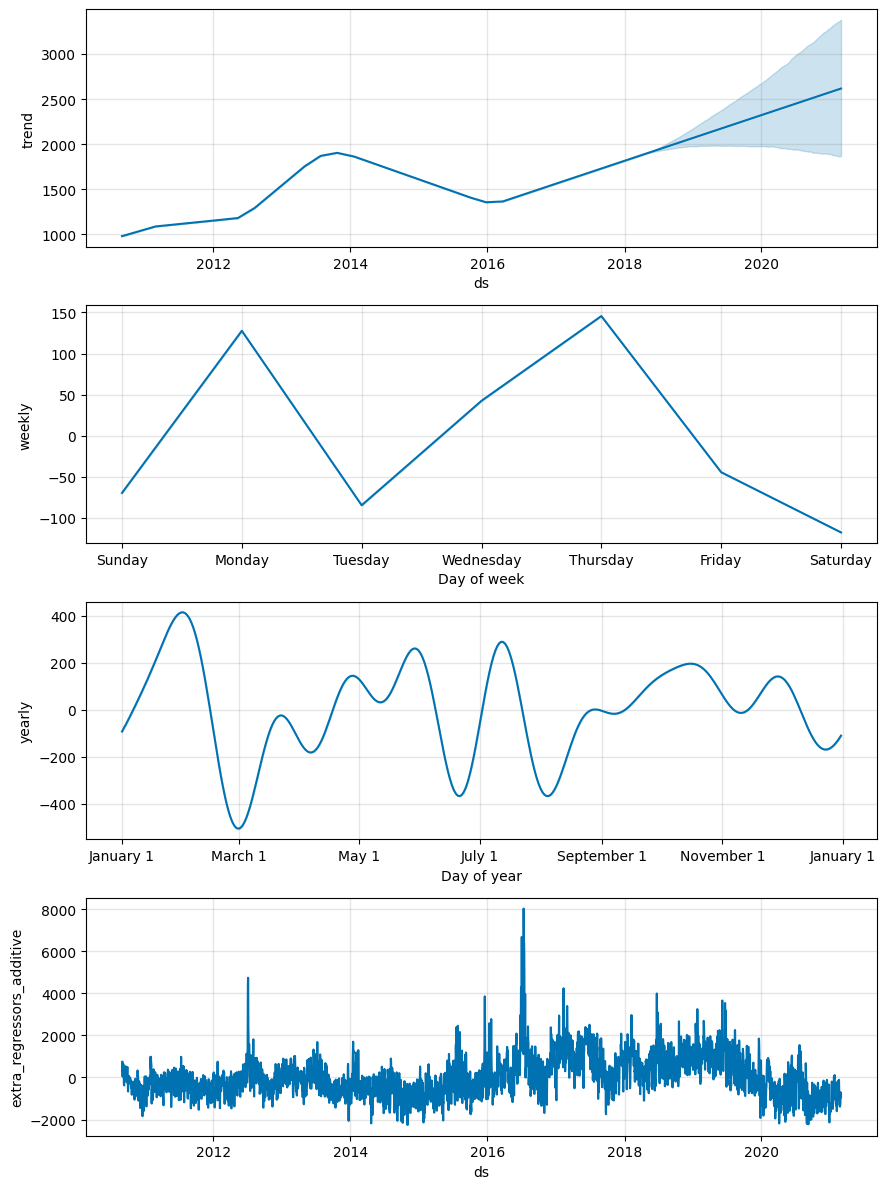

In [32]:
# plots component of the forecast
model_mul.plot_components(forecast2)
plt.show()

## Drop Tmax from the table

In [33]:
df_train = train_mul.drop(['add2'], axis=1)
df_train.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [34]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add3')

In [35]:
model.fit(df_train)

03:51:45 - cmdstanpy - INFO - Chain [1] start processing
03:51:46 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
pred = model.make_future_dataframe(periods=len(test_mul), freq='D')

In [37]:
data_3 = df_daily.reset_index()[['FullDate','SysLoad','GasPrice','ElecPrice']].rename(
    {'FullDate':'ds', 'SysLoad':'add1', 'GasPrice':'add3', 'ElecPrice':'y'}, axis=1
)
data_3.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [38]:
pred['add1'] = data_3['add1']
pred['add3'] = data_3['add3']
pred

,ds,add1,add3
0,2010-09-01,41565.38000,88.5600
1,2010-09-02,38898.99000,88.5600
2,2010-09-03,41665.76000,106.8000
3,2010-09-04,35638.08500,81.3600
4,2010-09-05,35611.41000,106.8000
...,...,...,...
3829,2021-02-24,-1525.49745,134.4000
3830,2021-02-25,4539.07855,130.5048
3831,2021-02-26,9517.02430,130.1808
3832,2021-02-27,4932.88015,130.0800


In [39]:
forecast = model.predict(pred)

In [40]:
y_true = test_mul['y'].values
y_pred = forecast['yhat'][2757:].values

mape = round(Mape(y_true, y_pred), 2)
print(f'MAPE of Multivariate model without Tmax: {mape}')

MAPE of Multivariate model without Tmax: 232.97
